 https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k/data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

In [10]:
df=pd.read_csv('Fremont_Bridge.csv',index_col='Date',parse_dates=True)
df.columns=['East','West']

In [11]:
df['Total']=df['East'] + df['West']

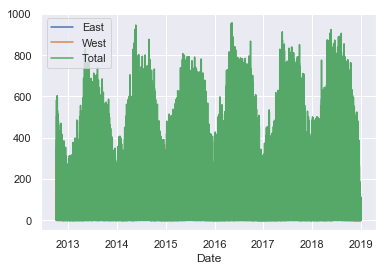

In [12]:
sns.set()
df.plot();

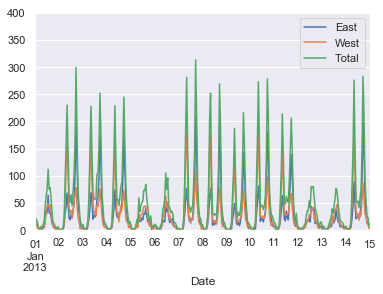

In [15]:
_=df.plot()
_.set_xlim(datetime.datetime(2013,1,1),datetime.datetime(2013,1,15))
_.set_ylim(0,400);

In [16]:
weekly=df.resample('W').sum()
weekly.head(3)

,East,West,Total
Date,,,
2012-10-07,6995.0,7297.0,14292.0
2012-10-14,8116.0,8679.0,16795.0
2012-10-21,7563.0,7946.0,15509.0


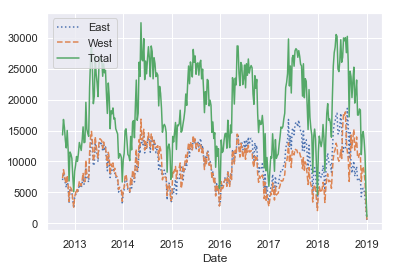

In [17]:
weekly.plot(style=[':','--','-']);

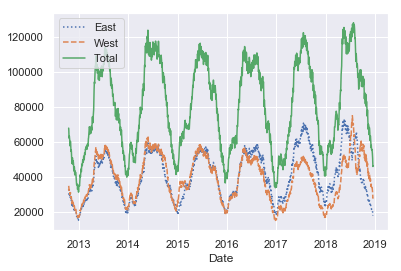

In [18]:
daily=df.resample('D').sum()
daily_mean=daily.rolling(30,center=True).sum()
daily_mean.plot(style=[':','--','-']);

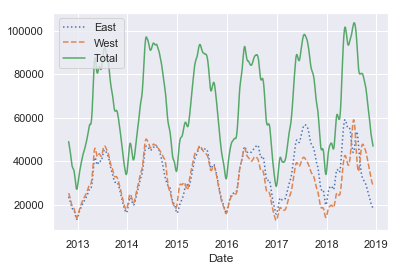

In [19]:
daily_gauss=daily.rolling(50,center=True,win_type='gaussian').sum(std=10)
daily_gauss.plot(style=[':','--','-']);

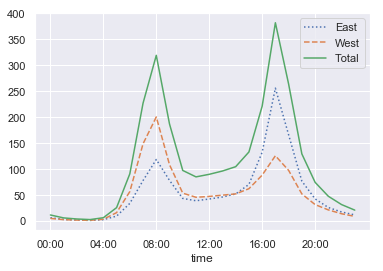

In [20]:
day_time=df.groupby(df.index.time).mean()
hourly_ticks=day_time.index.values[::4]
g=day_time.plot(style=[':','--','-']);
g.set_xticks(hourly_ticks);

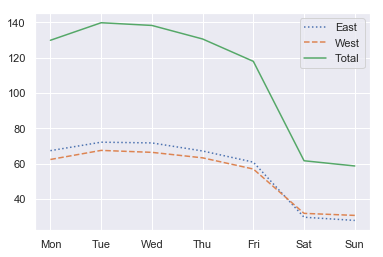

In [21]:
week_day=df.groupby(df.index.dayofweek).mean()
week_name=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
week_day.index=week_name

g=week_day.plot(style=[':','--','-'])
g.set_xticks(np.arange(len(week_name)));# тут нужно объяснить, что нумерация идет с 1, поэтому танец с бубном!
g.set_xticklabels(week_name);

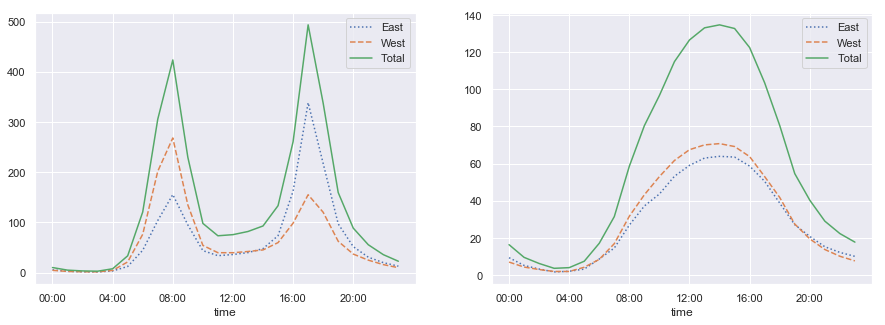

In [22]:
day_type=np.where(df.index.dayofweek<5,'Workday','Weekend')
by_day=df.groupby([day_type,df.index.time]).mean()

fig , ax = plt.subplots(1,2,figsize=(15,5))

by_day.loc['Workday'].plot(ax=ax[0],xticks=hourly_ticks,style=[':','--','-']);
by_day.loc['Weekend'].plot(ax=ax[1],xticks=hourly_ticks,style=[':','--','-']);

In [26]:
day_month=df.index.month
by_month_day=df.groupby([day_month,day_type,df.index.time]).mean()
by_month_day.index.names=['month','day','time']
by_month_day.head()

East      West     Total
month day     time                                  
1     Weekend 00:00:00  5.673077  4.288462  9.961538
              01:00:00  3.134615  2.980769  6.115385
              02:00:00  1.788462  1.903846  3.692308
              03:00:00  0.903846  1.000000  1.903846
              04:00:00  1.173077  1.115385  2.288462

In [27]:
df_1=by_month_day.reset_index()
df_1.head()

,month,day,time,East,West,Total
0,1,Weekend,00:00:00,5.673077,4.288462,9.961538
1,1,Weekend,01:00:00,3.134615,2.980769,6.115385
2,1,Weekend,02:00:00,1.788462,1.903846,3.692308
3,1,Weekend,03:00:00,0.903846,1.000000,1.903846
4,1,Weekend,04:00:00,1.173077,1.115385,2.288462


/home/xenakas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


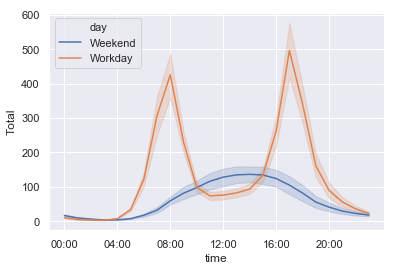

In [30]:
fig, ax = plt.subplots()
sns.lineplot(data=df_1, x='time', y='Total', hue='day')
plt.xticks(hourly_ticks);

/home/xenakas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


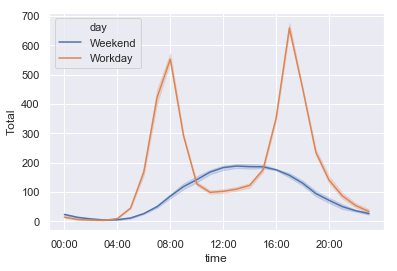

In [31]:
df_2=df_1[df_1.month.isin([5,6,7,8])]
fig, ax =plt.subplots()
sns.lineplot(data=df_2, x='time', y='Total', hue='day')
plt.xticks(hourly_ticks);